# Undirected, Directed, and Weighted Graphs

## Lesson Overview

Until now, most graphs we've been dealing with have been undirected graphs, where all edges have no stated direction. There are also directed graphs, in which an edge can only be traversed in one direction, and weighted graphs, which are a type of graph in which traversing an edge has some **cost** or **weight** associated with it. Let's take a closer look at these three graph types.

> An **undirected graph** is a graph in which all edges have no direction, so an $1 \rightarrow 2$ edge implies a $2 \rightarrow 1$ edge.

Undirected graphs work best when you want to express a reciprocal connection between two nodes. For instance, in many social networking sites, friendships are reciprocal: if I am your friend, you are my friend. Usually, in graph diagrams, that means that edges are represented with a solid line connecting the two nodes, like this:

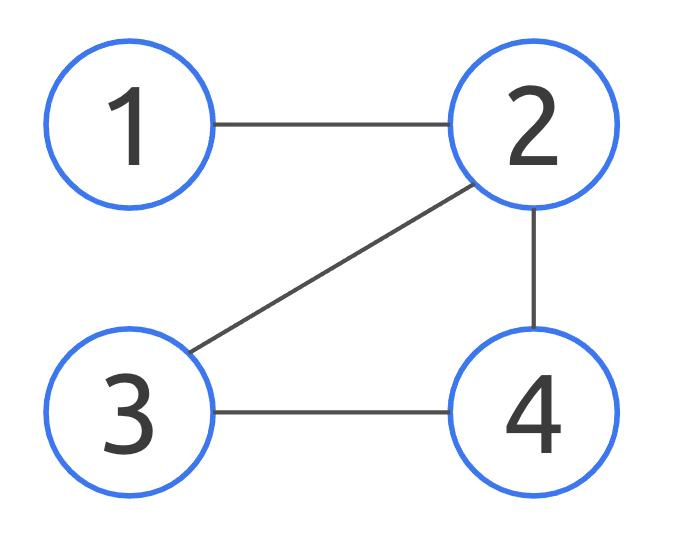

> A **directed graph** is a graph in which edges have a direction, so an $1 \rightarrow 2$ edge does not necessarily imply a $2 \rightarrow 1$ edge.

Directed graphs work best when your connections are not reciprocal. On those same social networking sites, you can often follow other users to get more information about what they post. If I'm following you, however, there is no requirement that you must also follow me. As another example, roads and highways are often represented by directed graphs. Even though there's usually a road from location $A$ to location $B$ if there's a road from $B \rightarrow A$, this is not always the case. A one-way street is an example of a situation where an $A \rightarrow B$ road does not have a $B \rightarrow A$ equivalent. For directed graphs, edges are generally represented with arrows, like this:

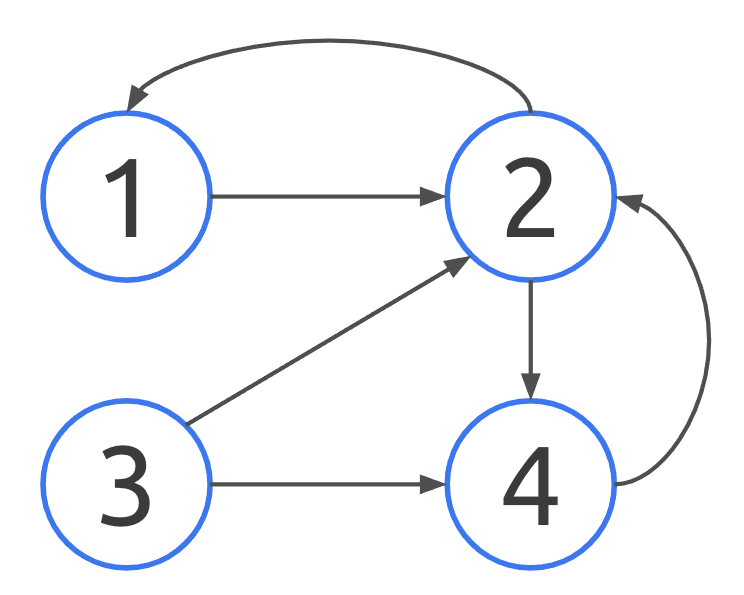

> A **weighted graph** is a graph in which the edges of the graph have an associated weight, or cost.

Weighted graphs are most commonly used when you want to express that one connection is easier to traverse than another. This is useful for path-finding algorithms. The highway example would best be represented as a weighted graph, where the weight is the mileage between location $A$ and location $B$. If the mileage between $C$ and $D$ was lower than the mileage between $A$ and $B$, the weight of that edge would be lower than the weight of the $A \rightarrow B$ edge. "Weight" and "cost" are used interchangeably in the context of weighted graphs. Weighted graphs can be directed or undirected, but generally the weight is written next to the edge in question:

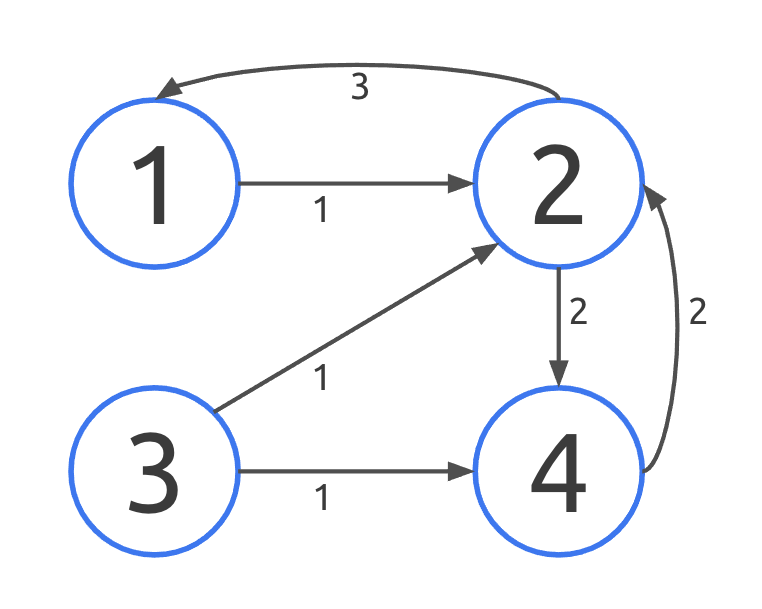

### Representing graphs in memory

Representing different types of graphs in memory can require additional data to be stored beyond what we typically store for an undirected graph. In some cases, you may even store less data, as you do not need to track the reciprocal connection.

Undirected graphs can be represented as adjacency lists (a list of nodes that store their connections to other nodes) or adjacency matrices (a matrix that stores a 1 at $(M, N)$ if node $M$ has a connection to node $N$) with information about nodes and edges added as needed.

Directed graphs can be represented similarly, but since the edge connections aren't reciprocal, adding a connection should not add one in the opposite direction. In an adjacency matrix, for instance, that means that you may have a 1 in the matrix without a corresponding 1 in the symmetric location (as you would for an undirected graph), as in the following graph.

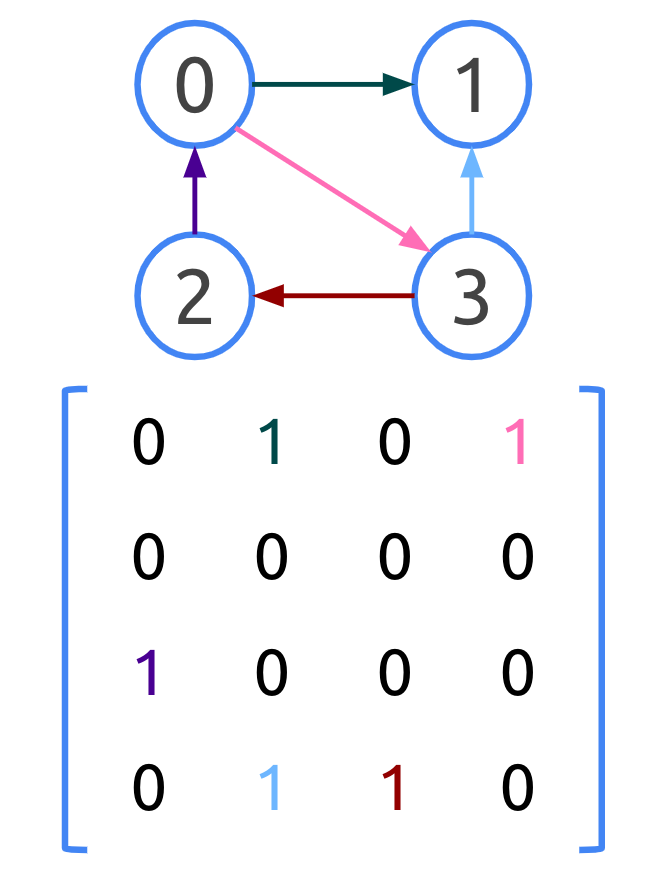

Notice how the $3 \rightarrow 2$ edge doesn't have a corresponding $2 \rightarrow 3$ edge, and how that's reflected in the matrix. Each 1 has a color matching its corresponding edge in both the graph and the matrix.

For a weighted graph, you'll need to have a way to store the weights. This may require you to make a different `Edge` class for adjancency lists or to put the weight as the value in an adjacency matrix.


### Undirected graphs in code

Recall our earlier implementation of an undirected graph.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this 
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

The code below creates the following undirected graph.

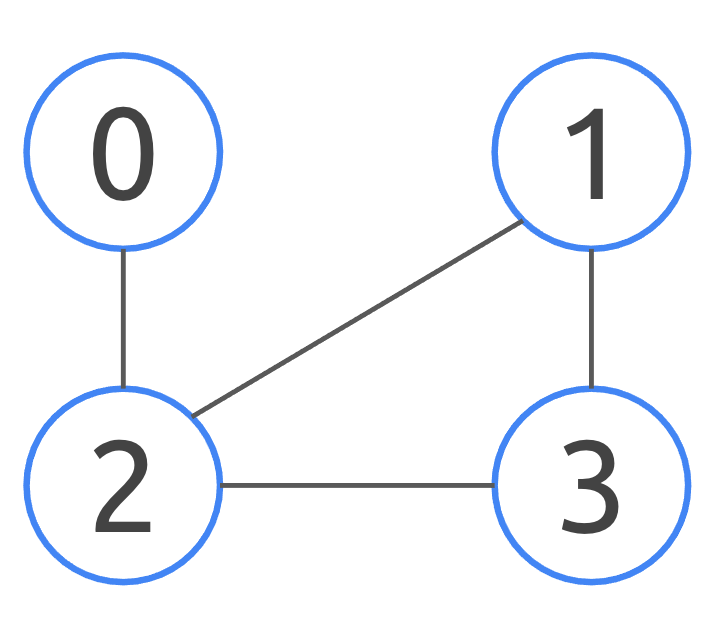

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[2].add_connection(node_list[3])

graph.print()

## Question 1

Which of the following statements about undirected graphs are true?

**a)** Nodes in undirected graphs cannot be connected to themselves via edges.

**b)** In an undirected graph, if node $A$ is connected to node $B$ and node $C$, a $B \longleftrightarrow C$ connection must also exist.

**c)** An undirected graph cannot have weights on edges.

**d)** Undirected graphs cannot be represented as adjacency matrices.

### Solution

All answers are incorrect.

**a)** There's no restriction on self-loops for undirected graphs.

**b)** The only connections that are guaranteed by that statement are $A \rightarrow C$, $A \rightarrow B$, $C \rightarrow A$, and $B \rightarrow A$.

**c)** A graph can be undirected and weighted at the same time.

**d)** There's no such restriction. When representing an undirected graph as an adjacency matrix, just remember that any $A \rightarrow B$ connection implies a $B \rightarrow A$ connection.

## Question 2

Which of the following statements about directed graphs are true?

**a)** A graph can be both directed and weighted at the same time.

**b)** In a directed graph, if a $A \rightarrow B$ connection exists, a $B \rightarrow A$ connection cannot exist.

**c)** A graph can have directed and undirected edges at the same time.

**d)** Undirected graphs can be represented as directed graphs as long as each $A \longleftrightarrow B$ edge is represented by an $A \rightarrow B$ edge and a $B \rightarrow A$ edge.

### Solution

The correct answers are **a)** and **d)**.

**b)** There's no restriction on reciprocal connections in directed graphs; they're just separate edges.

**c)** Generally, a directed graph stores an undirected edge as two reciprocal directed edges. If you want something with directed and undirected edges, it's often better to store the edges that way to make the graph consistent (and easier for another person to understand).

## Question 3

Which of the following real world graphs are better represented as directed graphs than undirected graphs?

**a)** A social network like Twitter (user $A$ can follow user $B$, but user $B$ does not have to follow user $A$ back) where an $A \rightarrow B$ edge exists if user $A$ follows user $B$.

**b)** A social network like Facebook (user $A$ can add user $B$ as a friend, but user $A$ is only friends with user $B$ if user $B$ is friends with user $A$) where an $A \rightarrow B$ edge exists if user $A$ is friends with $B$.

**c)** A representation of links between various websites online, where an $A \rightarrow B$ edge exists if page $A$ links to page $B$.

**d)** A graph representing a building's layout, where the edges are staircases connecting various floors.

**e)** A highway network between several major cities, where an $A \longleftrightarrow B$ edge exists if there is a highway between city $A$ and city $B$.

**f)** A representation of roads and intersections inside of a major city, where an $A \rightarrow B$ edge exists if there is a road between intersection $A$ and intersection $B$.

### Solution

The correct answers are **a)**, **c)**, and **f)**.

**a)** Those are properties of a node in a linked list and doubly linked list.

**b)** It's technically correct in the sense that all undirected graphs can be represented as a directed graph, but given that friendships are reciprocal, here, this graph is really more undirected.

**d)** Generally, stairs can be used to go both up and down, so there's no reason this shouldn't be an undirected graph. This might change if the stairs are escalators, though!

**e)** Highways are generally symmetrical (there aren't typically one-way highways), so if you have two cities connected via a highway that edge would typically be undirected.

## Question 4

Which of the following statements about weighted graphs are true?

**a)** Any undirected or directed graph is a weighted graph; all the edge weights are just the same value.

**b)** An adjacency matrix can be used to represent a weighted graph by storing the edge weights instead of 0 or 1.

**c)** A weighted graph cannot have negative edge weights.

**d)** A weighted graph should never have two edges with the same weight.

### Solution

The correct answers are **a)** and **b)**.

**c)** You could imagine a graph where the edges are business decisions that might make the company money, with each edge's weight being how much money the company would make. If you would *lose* money from traveling along that edge, the edge weight could be negative. There are other examples; try coming up with some!

**d)** There's no requirement for that to be the case. If that happens, then the cost of travelling along either of those edges is just the same.

## Question 5

Which of the following real world graphs can be represented as a weighted graph?

**a)** A network of airports where the weights are the average price of a flight between those two airports.

**b)** A network of airports where the weights are the average distance of a flight between those two airports.

**c)** A branching storyline where the weights are the number of pages before the next branch in the story.

**d)** The internet, where the weights correspond to the time to load page $B$ given a link from page $A$.

### Solution

All answers are correct.

## Question 6

There are some modifications that need to be made to convert an undirected graph class into a directed graph class. Given these `Node` and `UndirectedGraph` classes, convert the `UndirectedGraph` class to a `DirectedGraph` class. Don't forget to change the class name!

In [ ]:
# TODO(you): Make any changes needed to support being used by a DirectedGraph.
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

    
# TODO(you): Change this to a DirectedGraph class and make any changes needed
# to support that.
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

### Hint

The main thing that needs to be changed is that edges no longer need to be added reciprocally. So do you need to add any new code?

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4)]

graph = DirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[3])
node_list[1].add_connection(node_list[4])

graph.print()
# Should print multiline:
# 0: [2, 3]
# 1: [3, 4]
# 2: []
# 3: []
# 4: []

node_list[3].add_connection(node_list[4])

graph.print()
# Should print multiline:
# 0: [2, 3]
# 1: [3, 4]
# 2: []
# 3: [4]
# 4: []

### Solution

Since `Node`'s `add_connection` method adds an $A \rightarrow B$ and a $B \rightarrow A$ connection as an undirected graph, we just need to remove adding the $B \rightarrow A$ part of the code and now our code works for directed graphs. It still works for undirected graphs, too, you just need to make sure that the end user understands it doesn't add reciprocal connections. Adding a comment to that effect might help.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Note that to support undirected and directed graphs, we do not add
    # reciprocal edges. If using this code for an undirected graph, remember
    # to call this again with the nodes reversed to make sure that edge
    # gets added.
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)


class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

## Question 7

On many social media sites such as Twitter and Instagram, there is a notion of "followers" and "following", which is a relationship similar to a directed graph. A *mutual follow* exists when person A and person B mutually follow each other. For consistency with `Node`'s implementation, we'll refer to "follows" as connections.

Write a method called `get_mutual_connections` that, for a given `Node`, returns all the nodes with which it shares a *mutual connection*.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Note that to support undirected and directed graphs, we do not add
    # reciprocal edges. If using this code for an undirected graph, remember
    # to call this again with the nodes reversed to make sure that edge
    # gets added.
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

  def get_mutual_connections(self):
    # TODO(you): implement
    print('This method has not been implemented.')

In [ ]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

### Hint

When processing a specific node in `get_mutual_connections`, try to focus more on the nodes that the given node is connected to, rather than the given node itself.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4)]

graph = DirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[3])
node_list[1].add_connection(node_list[4])

print([n.name for n in node_list[1].get_mutual_connections()])
# Should print: []

node_list[3].add_connection(node_list[1])
node_list[4].add_connection(node_list[1])

print([n.name for n in node_list[1].get_mutual_connections()])
# Should print: [3, 4]

### Solution

This requires us to dig into our given node's `connected_to` list and, for each node in there, see if our given node is in the connected node's `connected_to` list.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Note that to support undirected and directed graphs, we do not add
    # reciprocal edges. If using this code for an undirected graph, remember
    # to call this again with the nodes reversed to make sure that edge
    # gets added.
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

  def get_mutual_connections(self):
    mutual_connections = []
    for connected_node in self.connected_to:
      if self in connected_node.connected_to:
        mutual_connections.append(connected_node)
    return mutual_connections

In [ ]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

## Question 8

Let's create a class for storing information about edges. Having an explicit `Edge` class allows us to store additional information on that edge, like the edge's weight. You can think of weight as the "length" of an edge, detailing how easy it is to get from one node to another. This will ultimately allow us to create a directed weighted graph implementation.

This `Edge` class should contain the two nodes being connected and an integer that stores the edge's cost. After finishing the `__init__` method, complete the `add_connection` method of a new `EdgeNode` class that stores a list of edges as connections.


In [ ]:
class EdgeNode:
  # Implementation of a graph node that uses the Edge class.

  def __init__(self, name):
    self.name = name
    self.edge_list = []

  def add_connection(self, other_node):
    # TODO(you): Implement
    print('This method has not been implemented.')


class Edge:
  # Implementation of a graph edge.

  def __init__(self, node_one, node_two, cost=0):
    # TODO(you): Implement
    print('This method has not been implemented.')

### Hint

When using `add_connection`, you should be creating a new edge between the two nodes and then storing it inside of `self.edge_list`. What do you need to store in the `Edge` class's `__init__` method to make sure that all of the relevant data is available when that `Edge` is accessed?

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
four_nodes = [EdgeNode(i) for i in range(4)]

four_nodes[0].add_connection(four_nodes[1]) # Create an edge.
print(len(four_nodes[0].edge_list))
# Should print: 1

four_nodes[0].add_connection(four_nodes[2]) # Add another new edge.
print(len(four_nodes[0].edge_list))
# Should print: 2

four_nodes[0].add_connection(four_nodes[1]) # Attempt to add a duplicate edge.
print(len(four_nodes[0].edge_list))
# Should print: 2

### Solution

When initializing the new `Edge`, make sure you're storing both nodes and the cost on the object. Inside of `add_connection`, you should create a new edge between `self` and the other node and store it inside of `self.edge_list`. Just make sure to check you're not storing an edge you already have stored!

In [ ]:
class EdgeNode:
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name):
    self.name = name
    self.edge_list = []

  def add_connection(self, other_node):
    for edge in self.edge_list:
      if edge.node_two == other_node:
        return
    self.edge_list.append(Edge(self, other_node))


class Edge:
  # Implementation of an adjacency list graph edge.

  def __init__(self, node_one, node_two, cost=0):
    self.node_one = node_one
    self.node_two = node_two
    self.cost = cost

## Question 9

One issue that comes up when you add additional information or complexity to a class is that you now have to update your formerly-working methods. For instance, `remove_node` in `DirectedGraph` now makes reference to a `connected_to` attribute that no longer exists. Update `remove_node` so that it continues to work.

In [ ]:
class EdgeNode:
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name):
    self.name = name
    self.edge_list = []

  def add_connection(self, other_node):
    for edge in self.edge_list:
      if edge.node_two == other_node:
        return
    self.edge_list.append(Edge(self, other_node))

  def __repr__(self):
    return '%s: %s' % (self.name, 
        ['-> %s (%s)' % (e.node_two.name, e.cost) for e in self.edge_list])


class Edge:
  # Implementation of an adjacency list graph edge.

  def __init__(self, node_one, node_two, cost=0):
    self.node_one = node_one
    self.node_two = node_two
    self.cost = cost

  def __repr__(self):
    return '%s -> %s (%s)' % (
        self.node_one.name, self.node_two.name, self.cost
    )
    
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
  # TODO(you): Update this method so it works with EdgeNode.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

### Hint

Don't forget to remove the edges from the various nodes' `edge_list` objects, as well.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
graph = DirectedGraph()
node_list = [EdgeNode('0'), EdgeNode('1'), EdgeNode('2'), EdgeNode('3'),
             EdgeNode('4'), EdgeNode('5'), EdgeNode('6')]
node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[3])
node_list[0].add_connection(node_list[6])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[4])
node_list[2].add_connection(node_list[5])
node_list[2].add_connection(node_list[6])
node_list[3].add_connection(node_list[6])
node_list[4].add_connection(node_list[6])
node_list[5].add_connection(node_list[6])

for node in node_list:
  graph.add_node(node)

graph.print()
# Should print multiline:
# 0: ['-> 1 (0)', '-> 3 (0)', '-> 6 (0)']
# 1: ['-> 2 (0)', '-> 4 (0)']
# 2: ['-> 5 (0)', '-> 6 (0)']
# 3: ['-> 6 (0)']
# 4: ['-> 6 (0)']
# 5: ['-> 6 (0)']
# 6: []

graph.remove_node(node_list[6])

graph.print()
# Should print multiline:
# 0: ['-> 1 (0)', '-> 3 (0)']
# 1: ['-> 2 (0)', '-> 4 (0)']
# 2: ['-> 5 (0)']
# 3: []
# 4: []
# 5: []

### Solution

We unfortunately have to brute-force this by going through the nodes in the graph and removing any edges that contain the node in question. It's possible to do this more efficiently, but we would likely need to store additional information in the `EdgeNode` class itself (imagine something like `outbound_edge_list` or `inbound_edge_list` to make it clear which nodes have edges to a given node and which nodes have edges *from* a given node.

In [ ]:
class EdgeNode:
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name):
    self.name = name
    self.edge_list = []

  def add_connection(self, other_node):
    for edge in self.edge_list:
      if edge.node_two == other_node:
        return
    self.edge_list.append(Edge(self, other_node))

  def __repr__(self):
    return '%s: %s' % (self.name, 
        ['-> %s (%s)' % (e.node_two.name, e.cost) for e in self.edge_list])


class Edge:
  # Implementation of an adjacency list graph edge.

  def __init__(self, node_one, node_two, cost=0):
    self.node_one = node_one
    self.node_two = node_two
    self.cost = cost

  def __repr__(self):
    return '%s -> %s (%s)' % (
        self.node_one.name, self.node_two.name, self.cost
    )


class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      for potential_edge in potential_node.edge_list:
        if potential_edge.node_two == node:
          potential_node.edge_list.remove(potential_edge)
    node.edge_list = []

  def print(self):
    for node in self.node_list:
      print(node)

## Question 10

You're looking for a new dorm on campus. You've got some options, but you're trying to prioritize your studies, and you don't really enjoy biking around campus. You can represent your campus as a graph, using a `CampusMap` object that implements an undirected, weighted graph (there are no one-way footpaths on campus). In this implementation, the buildings on campus are the nodes and the footpaths between buildings are the edges. The weights on the edges are the distances between the buildings. To make the graph more realistic, let's create a `Building` class that is a subclass of our `Node` class. This new class stores the building's name, its type (dorm, dining hall, classroom, library, or other), and the paths to other nodes.

A campus, then, may look like this (not drawn to scale):

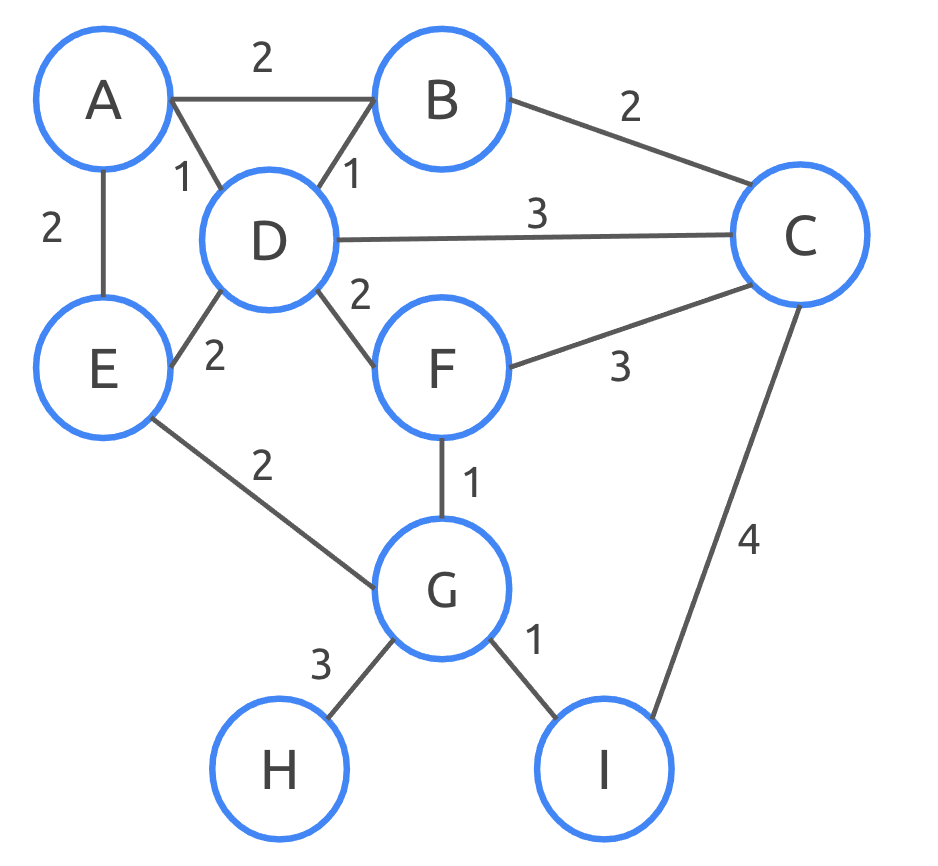

Write a `closest_dorm` method for the `CampusMap` class that, given a map of campus, returns the dorm with the smallest average distance from other buildings that it is connected to. Make sure that you're returning the closest building that is a dorm, not just the closest building!

In [ ]:
class EdgeNode:
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name):
    self.name = name
    self.edge_list = []

  def add_connection(self, other_node):
    for edge in self.edge_list:
      if edge.node_two == other_node:
        return
    self.edge_list.append(Edge(self, other_node))

  def __repr__(self):
    return '%s: ' % self.name + (
        ['-> %s (%s)' % (e.node_two.name, e.cost) for e in self.edge_list])


class Edge:
  # Implementation of an adjacency list graph edge.

  def __init__(self, node_one, node_two, cost=0):
    self.node_one = node_one
    self.node_two = node_two
    self.cost = cost

  def __repr__(self):
    return '%s -> %s (%s)' % (
        self.node_one.name, self.node_two.name, self.cost
    )


class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      for potential_edge in potential_node.edge_list:
        if potential_edge.node_two == node:
          potential_node.edge_list.remove(potential_edge)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
class Building(EdgeNode):
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name, building_type):
    self.name = name
    self.building_type = building_type
    self.connected_building_list = []

  def add_connection(self, other_building, distance):
    for path in self.connected_building_list:
      if path.building_two == other_building:
        return
    self.connected_building_list.append(Path(self, other_building, distance))
    other_building.connected_building_list.append(
        Path(other_building, self, distance))

  def get_name(self):
    return self.name

  def get_type(self):
    return self.building_type

  def __repr__(self):
    return '%s (%s): ' % (self.name, self.building_type) + (
        ['-> %s (%s)' % (
            e.building_two.name, 
            e.distance) for e in self.connected_building_list])


class Path(Edge):
  # Implementation of path between two buildings on campus.

  def __init__(self, building_one, building_two, distance=0):
    self.building_one = building_one
    self.building_two = building_two
    self.distance = distance

  def __repr__(self):
    return '%s - %s (%s)' % (
        self.building_one.name, self.building_two.name, self.distance
    )


class CampusMap:

  def __init__(self):
    self.building_list = []

  def add_building(self, building):
    self.building_list.append(building)

  def print(self):
    for building in self.building_list:
      print(building)

  def closest_dorm(self):
    # TODO(you): implement
    print('This method has not been implemented!')

### Hint

The key thing to watch out for on this one is that you don't really need to traverse every pathway; you just need to go node-by-node and average the weights. Watch out, though: you only want to return the dorm with the shortest average distance, not any building! And watch out for integer division versus float division.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
campus = CampusMap()
building_list = [
                 Building('Ackbar Hall', 'classroom'), 
                 Building('Bennett Dining', 'dining hall'), 
                 Building('Cumber Biology Hall', 'classroom'), 
                 Building('Drake Dorm', 'dorm'),
                 Building('Eagle Square', 'other'), 
                 Building('Freeman Dining', 'dining hall'), 
                 Building('Gwen Plaza', 'other'), 
                 Building('Hyde Dorm', 'dorm'), 
                 Building('Ithaca Library', 'library')]
building_list[0].add_connection(building_list[1], 2)
building_list[0].add_connection(building_list[3], 2)
building_list[0].add_connection(building_list[4], 1)
building_list[1].add_connection(building_list[2], 2)
building_list[1].add_connection(building_list[3], 1)
building_list[2].add_connection(building_list[3], 3)
building_list[2].add_connection(building_list[5], 3)
building_list[2].add_connection(building_list[8], 4)
building_list[3].add_connection(building_list[4], 2)
building_list[3].add_connection(building_list[5], 2)
building_list[4].add_connection(building_list[6], 2)
building_list[5].add_connection(building_list[6], 1)
building_list[6].add_connection(building_list[7], 3)
building_list[6].add_connection(building_list[8], 1)

for building in building_list:
  campus.add_building(building)

print(campus.closest_dorm())
# Should print: Drake Dorm

### Solution

In [ ]:
class Building(EdgeNode):
  # Implementation of an adjacency list graph node that uses Edge.

  def __init__(self, name, building_type):
    self.name = name
    self.building_type = building_type
    self.connected_building_list = []

  def add_connection(self, other_building, distance):
    for path in self.connected_building_list:
      if path.building_two == other_building:
        return
    self.connected_building_list.append(Path(self, other_building, distance))
    other_building.connected_building_list.append(
        Path(other_building, self, distance))

  def get_name(self):
    return self.name

  def get_type(self):
    return self.building_type

  def __repr__(self):
    return '%s (%s): ' % (self.name, self.building_type) + (
        ['-> %s (%s)' % (
            e.building_two.name, 
            e.distance) for e in self.connected_building_list])


class Path(Edge):
  # Implementation of path between two buildings on campus.

  def __init__(self, building_one, building_two, distance=0):
    self.building_one = building_one
    self.building_two = building_two
    self.distance = distance

  def __repr__(self):
    return '%s - %s (%s)' % (
        self.building_one.name, self.building_two.name, self.distance
    )

class CampusMap:

  def __init__(self):
    self.building_list = []

  def add_building(self, building):
    self.building_list.append(building)

  def print(self):
    for building in self.building_list:
      print(building)

  def closest_dorm(self):
    min_average = -1.0
    closest_dorm = None
    for building in self.building_list:
      if building.building_type != 'dorm':
        continue
      total_distance = 0.0
      for path in building.connected_building_list:
        total_distance += path.distance
      average = total_distance / len(building.connected_building_list)
      if average <= min_average or min_average == -1.0:
        min_average = average
        closest_dorm = building.name
    return closest_dorm